In [933]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import once
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [934]:
df = pd.read_csv(r'C:\Users\ajibo\Desktop\DATA SCIENCE RESOURCE\DATASET\gym_members_exercise_tracking_synthetic_data.csv')

In [935]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1790 non-null   float64
 1   Gender                         1729 non-null   object 
 2   Weight (kg)                    1778 non-null   float64
 3   Height (m)                     1774 non-null   float64
 4   Max_BPM                        1779 non-null   object 
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [937]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83


In [938]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 1800
Number of Columns: 15


In [939]:
df.duplicated().sum()

0

In [940]:
df[df.isnull().any(axis =1)]

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
11,46.0,Male,40.0,1.88,168,131.0,69.0,2.00,672.0,NaN,25.4,2.4,2.0,2.0,12.32
19,NaN,Male,63.0,1.51,184,169.0,71.0,1.30,1136.0,Cardio,23.8,2.3,3.0,2.0,22.69
22,36.0,Female,64.2,1.78,192,130.0,74.0,1.38,1708.0,Yoga,31.9,2.1,NaN,1.0,25.59
23,18.0,Male,129.4,1.50,177,145.0,71.0,NaN,772.0,Strength,22.0,1.7,5.0,1.0,18.07
27,18.0,Male,40.0,1.72,188,155.0,74.0,1.51,1266.0,Cardio,26.4,2.5,2.0,NaN,17.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,NaN,Female,82.7,1.79,191,124.0,NaN,1.15,823.0,HIIT,31.8,1.8,3.0,1.0,12.32
1771,18.0,Female,65.5,1.69,178,134.0,53.0,1.29,405.0,Cardio,24.4,NaN,4.0,2.0,12.32
1774,28.0,Female,93.2,1.71,176,149.0,60.0,1.40,1348.0,HIIT,27.2,2.1,NaN,2.0,14.12
1783,36.0,Male,80.8,1.91,184,NaN,59.0,0.99,780.0,HIIT,23.6,3.3,4.0,2.0,18.61


In [941]:
df.isnull().sum()

Age                              10
Gender                           71
Weight (kg)                      22
Height (m)                       26
Max_BPM                          21
Avg_BPM                          30
Resting_BPM                      19
Session_Duration (hours)         23
Calories_Burned                  23
Workout_Type                     61
Fat_Percentage                   16
Water_Intake (liters)            24
Workout_Frequency (days/week)    58
Experience_Level                 57
BMI                              30
dtype: int64

In [942]:
df['Max_BPM'].unique()

array(['174', '166', '187', '177', '161', '191', '181', '195', '168',
       '186', '176', '197', '171', '184', '196', '173', '192', '165',
       '188', '183', '189', '193', '198', '199', '180', '178', '\\t182',
       '160', '194', nan, '185', '167', '169', '172', '182', '164', '175',
       '163', '170', '190', '162', '179', '\\n175'], dtype=object)

In [943]:
df['Max_BPM'] = df['Max_BPM'].str.replace('\\', '').str.replace('n', '').str.replace('t','')

In [944]:
df['Max_BPM'].unique()

array(['174', '166', '187', '177', '161', '191', '181', '195', '168',
       '186', '176', '197', '171', '184', '196', '173', '192', '165',
       '188', '183', '189', '193', '198', '199', '180', '178', '182',
       '160', '194', nan, '185', '167', '169', '172', '164', '175', '163',
       '170', '190', '162', '179'], dtype=object)

In [945]:
df['Max_BPM'] = df['Max_BPM'].fillna(0)

In [946]:
df['Max_BPM'].unique()

array(['174', '166', '187', '177', '161', '191', '181', '195', '168',
       '186', '176', '197', '171', '184', '196', '173', '192', '165',
       '188', '183', '189', '193', '198', '199', '180', '178', '182',
       '160', '194', 0, '185', '167', '169', '172', '164', '175', '163',
       '170', '190', '162', '179'], dtype=object)

In [947]:
df['Max_BPM'] = df['Max_BPM'].astype(int)

In [948]:
df['Max_BPM'].info

<bound method Series.info of 0       174
1       166
2       187
3       187
4       177
       ... 
1795    173
1796    164
1797    188
1798    180
1799    184
Name: Max_BPM, Length: 1800, dtype: int32>

In [949]:
df['Age'] = df['Age'].fillna(0)

In [950]:
df['Gender'] = df['Gender'].fillna('Unknown')

In [951]:
df['Weight (kg)'] = df['Weight (kg)'].fillna(df['Weight (kg)'].mean())

In [952]:
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].mean())

In [953]:
df['Height (m)'] = df['Height (m)'].fillna(df['Height (m)'].mean())

In [954]:
df['Max_BPM'].unique()

array([174, 166, 187, 177, 161, 191, 181, 195, 168, 186, 176, 197, 171,
       184, 196, 173, 192, 165, 188, 183, 189, 193, 198, 199, 180, 178,
       182, 160, 194,   0, 185, 167, 169, 172, 164, 175, 163, 170, 190,
       162, 179])

In [955]:
df['Age'].unique()

array([34., 26., 22., 54., 38., 44., 50., 18., 39., 46., 19., 56., 30.,
       23.,  0., 36., 25., 59., 32., 28., 27., 20., 51., 52., 35., 21.,
       48., 37., 49., 42., 24., 33., 47., 45., 55., 41., 29., 43., 57.,
       31., 53., 58., 40.])

In [956]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1800 entries, 0 to 1799
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
1800 non-null   float64
dtypes: float64(1)
memory usage: 14.2 KB


In [957]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Gender                         1800 non-null   object 
 2   Weight (kg)                    1800 non-null   float64
 3   Height (m)                     1800 non-null   float64
 4   Max_BPM                        1800 non-null   int32  
 5   Avg_BPM                        1770 non-null   float64
 6   Resting_BPM                    1781 non-null   float64
 7   Session_Duration (hours)       1777 non-null   float64
 8   Calories_Burned                1777 non-null   float64
 9   Workout_Type                   1739 non-null   object 
 10  Fat_Percentage                 1784 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [958]:
df['Avg_BPM'] = df['Avg_BPM'].fillna(df['Avg_BPM'].mean())

In [959]:
df['Resting_BPM'] = df['Resting_BPM'].fillna(df['Resting_BPM'].mean())

In [960]:
df['Session_Duration (hours)'] = df['Session_Duration (hours)'].fillna(0)

In [961]:
df['Calories_Burned'] = df['Calories_Burned'].fillna(0)

In [962]:
df['Workout_Type'].unique()

array(['Strength', 'Cardio', 'HIIT', 'Yoga', nan, '\\nStrength',
       '\\tCardio', '\\tYoga'], dtype=object)

In [963]:
df['Workout_Type'] = df['Workout_Type'].str.replace('\\n','').str.replace('\\t','')

In [964]:
df['Workout_Type'].unique()

array(['Strength', 'Cardio', 'HIIT', 'Yoga', nan], dtype=object)

In [965]:
df['Workout_Type'].unique()

array(['Strength', 'Cardio', 'HIIT', 'Yoga', nan], dtype=object)

In [966]:
df['Workout_Type'] = df['Workout_Type'].fillna('Unknown')

In [967]:
df['Fat_Percentage'] = df['Fat_Percentage'].fillna(0)

In [968]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Gender                         1800 non-null   object 
 2   Weight (kg)                    1800 non-null   float64
 3   Height (m)                     1800 non-null   float64
 4   Max_BPM                        1800 non-null   int32  
 5   Avg_BPM                        1800 non-null   float64
 6   Resting_BPM                    1800 non-null   float64
 7   Session_Duration (hours)       1800 non-null   float64
 8   Calories_Burned                1800 non-null   float64
 9   Workout_Type                   1800 non-null   object 
 10  Fat_Percentage                 1800 non-null   float64
 11  Water_Intake (liters)          1776 non-null   float64
 12  Workout_Frequency (days/week)  1742 non-null   f

In [969]:
df['Water_Intake (liters)'] = df['Water_Intake (liters)'].fillna(0)

In [970]:
df['Workout_Frequency (days/week)'] = df['Workout_Frequency (days/week)'].fillna(0)

In [971]:
df['Experience_Level'] = df['Experience_Level'].fillna('Unknown')

In [972]:
df['BMI'] = df['BMI'].fillna(0)

In [973]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1800 non-null   float64
 1   Gender                         1800 non-null   object 
 2   Weight (kg)                    1800 non-null   float64
 3   Height (m)                     1800 non-null   float64
 4   Max_BPM                        1800 non-null   int32  
 5   Avg_BPM                        1800 non-null   float64
 6   Resting_BPM                    1800 non-null   float64
 7   Session_Duration (hours)       1800 non-null   float64
 8   Calories_Burned                1800 non-null   float64
 9   Workout_Type                   1800 non-null   object 
 10  Fat_Percentage                 1800 non-null   float64
 11  Water_Intake (liters)          1800 non-null   float64
 12  Workout_Frequency (days/week)  1800 non-null   f

In [974]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,34.283889,67.606637,1.739233,178.129444,146.259322,63.951151,1.373817,1020.490556,23.300389,2.670556,3.231667,19.625144
std,12.546078,19.739592,0.122993,22.458743,15.092083,7.894480,0.401632,346.016229,6.242645,0.770791,1.103432,7.001260
min,0.000000,40.000000,1.500000,0.000000,120.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,52.575000,1.660000,170.000000,134.000000,57.000000,1.120000,782.750000,20.175000,2.100000,3.000000,14.557500
50%,33.000000,65.700000,1.739233,181.000000,146.000000,65.000000,1.360000,1019.500000,24.200000,2.700000,3.000000,18.555000
75%,45.000000,80.000000,1.820000,190.000000,159.000000,72.000000,1.630000,1246.250000,27.500000,3.300000,4.000000,23.322500
max,59.000000,129.900000,2.000000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,49.840000


In [975]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65


In [976]:
df['CaloriesPerSession'] = df['Calories_Burned']/df['Session_Duration (hours)']

In [978]:
#Average Calories Burned per Workout Type
avg_calories = df.groupby("Workout_Type")["Calories_Burned"].mean()
print(avg_calories)

Workout_Type
Cardio      1042.990888
HIIT         994.665810
Strength     995.147059
Unknown      991.000000
Yoga        1052.744828
Name: Calories_Burned, dtype: float64


In [979]:
#Average Maximum Heart Rate by Experience Level

max_bpm_experience = df.groupby("Experience_Level")["Max_BPM"].mean()
print(max_bpm_experience)

Experience_Level
1.0        179.111111
2.0        178.023677
3.0        176.378830
Unknown    179.017544
Name: Max_BPM, dtype: float64


In [980]:
#Total Calories Burned per Gender
total_calories_gender = df.groupby("Gender")["Calories_Burned"].mean()
print(total_calories_gender)

Gender
Female     1002.997706
Male       1041.508751
Unknown     981.633803
Name: Calories_Burned, dtype: float64


In [981]:
workout_counts = df["Workout_Type"].value_counts()
workout_counts

Workout_Type
Strength    476
Cardio      439
Yoga        435
HIIT        389
Unknown      61
Name: count, dtype: int64

In [982]:
df['Calorie_Burn_Rate'] = df['Calories_Burned'] / df['Session_Duration (hours)']
df['Calorie_Burn_Rate']

0        635.714286
1        833.000000
2       1353.225806
3        433.103448
4        803.750000
           ...     
1795    1250.450450
1796    1775.324675
1797    1050.833333
1798     919.230769
1799     913.178295
Name: Calorie_Burn_Rate, Length: 1800, dtype: float64

In [983]:
df['Heart_Rate_Variability'] = df['Max_BPM'] - df['Avg_BPM']
df['Heart_Rate_Variability']

0       22.0
1       10.0
2       21.0
3       18.0
4        8.0
        ... 
1795    39.0
1796    -5.0
1797    59.0
1798    28.0
1799    28.0
Name: Heart_Rate_Variability, Length: 1800, dtype: float64

In [984]:

# Weekly Workout Frequency by Gender

workout_frequency_gender = df.groupby("Gender")["Workout_Frequency (days/week)"].mean()
print(workout_frequency_gender)

Gender
Female     3.255734
Male       3.211202
Unknown    3.183099
Name: Workout_Frequency (days/week), dtype: float64


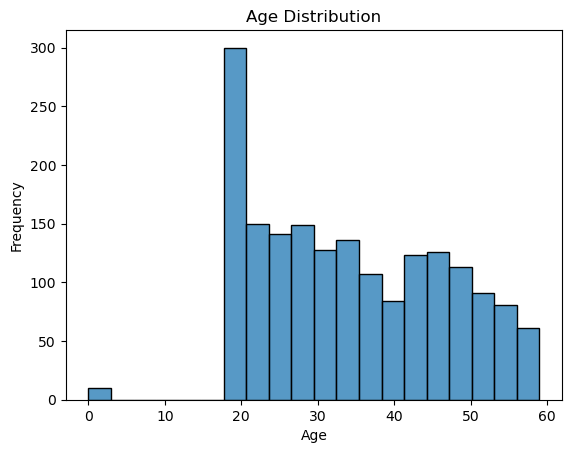

In [985]:
sns.histplot(df['Age'], bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

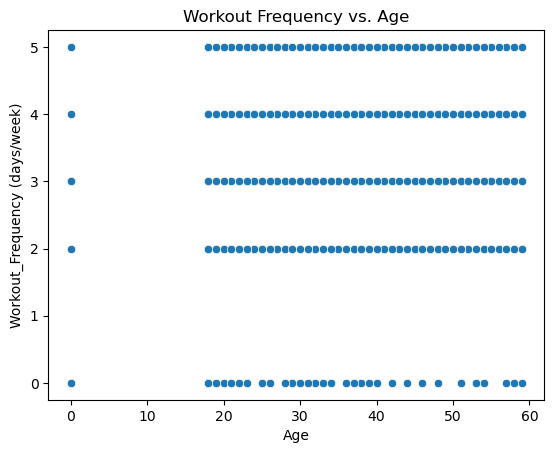

In [987]:
#Scatterplot
sns.scatterplot(data=df, x="Age", y="Workout_Frequency (days/week)")
plt.title("Workout Frequency vs. Age")
plt.show()

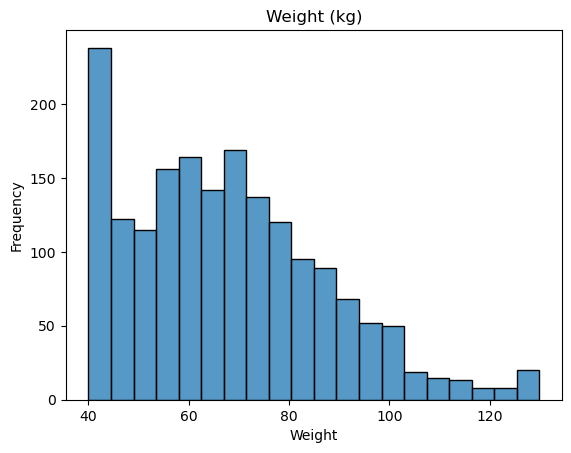

In [988]:
sns.histplot(df['Weight (kg)'], bins=20)
plt.title('Weight (kg)')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

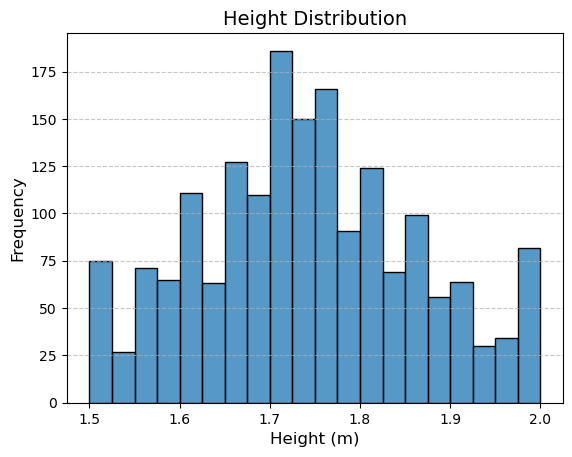

In [989]:
sns.histplot(data=df, x='Height (m)', bins=20, kde=False)  # Explicitly set data and x
plt.title('Height Distribution', fontsize=14)             # Add a meaningful title and set font size
plt.xlabel('Height (m)', fontsize=12)                     # Adjust axis labels for clarity
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)             # Add a grid for better readability
plt.show()

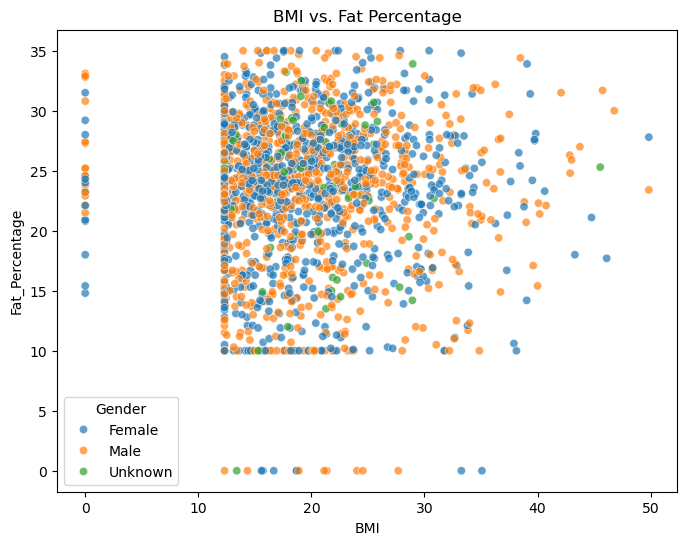

In [990]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="BMI", y="Fat_Percentage", hue="Gender", alpha=0.7)
plt.title("BMI vs. Fat Percentage")
plt.legend(title="Gender")
plt.show()


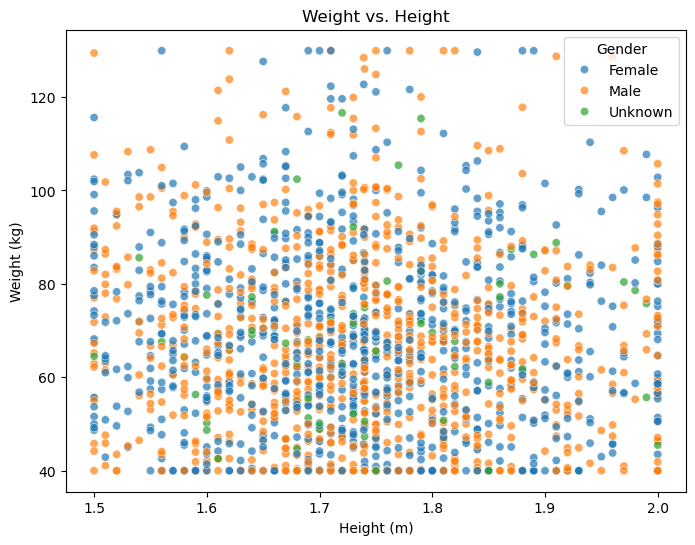

In [991]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Height (m)", y="Weight (kg)", hue="Gender", alpha=0.7)
plt.title("Weight vs. Height")
plt.legend(title="Gender")
plt.show()

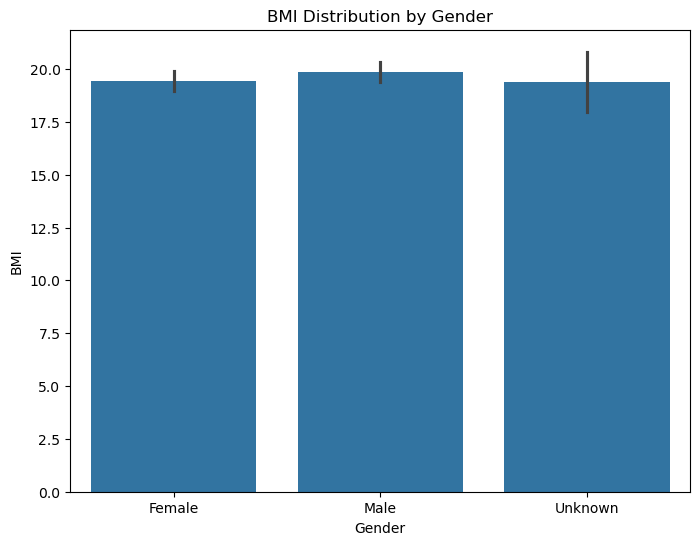

In [992]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="Gender", y="BMI")
plt.title("BMI Distribution by Gender")
plt.show()

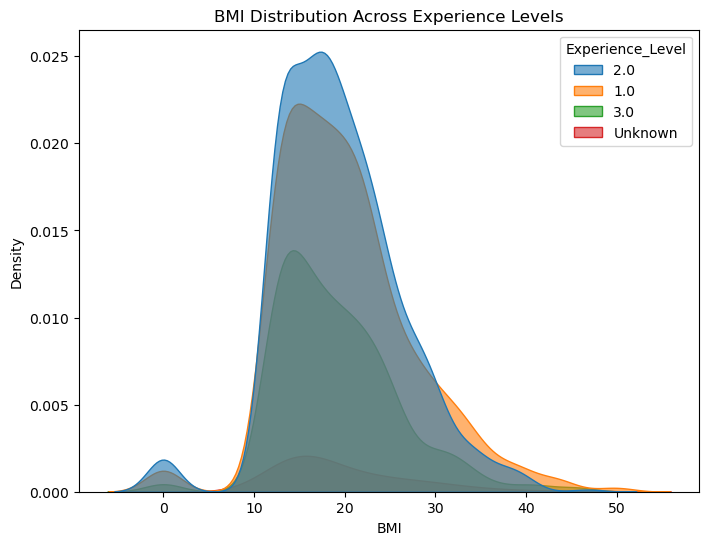

In [993]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="BMI", hue="Experience_Level", fill=True, alpha=0.6)
plt.title("BMI Distribution Across Experience Levels")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

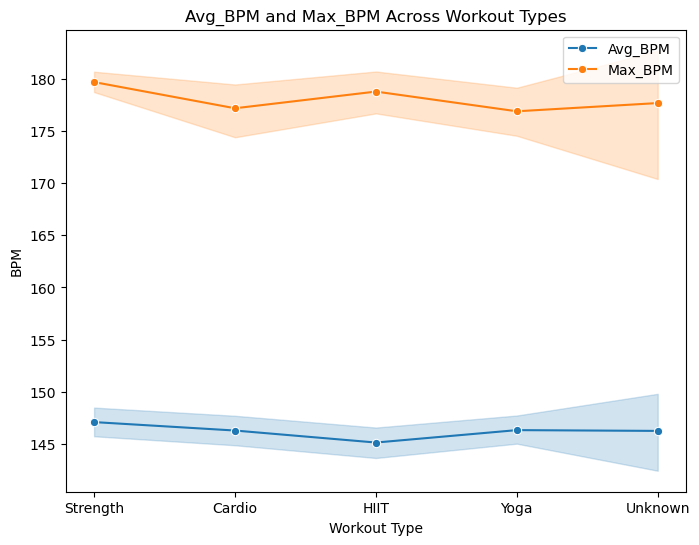

In [994]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="Workout_Type", y="Avg_BPM", marker="o", label="Avg_BPM")
sns.lineplot(data=df, x="Workout_Type", y="Max_BPM", marker="o", label="Max_BPM")
plt.title("Avg_BPM and Max_BPM Across Workout Types")
plt.xlabel("Workout Type")
plt.ylabel("BPM")
plt.legend()
plt.show()

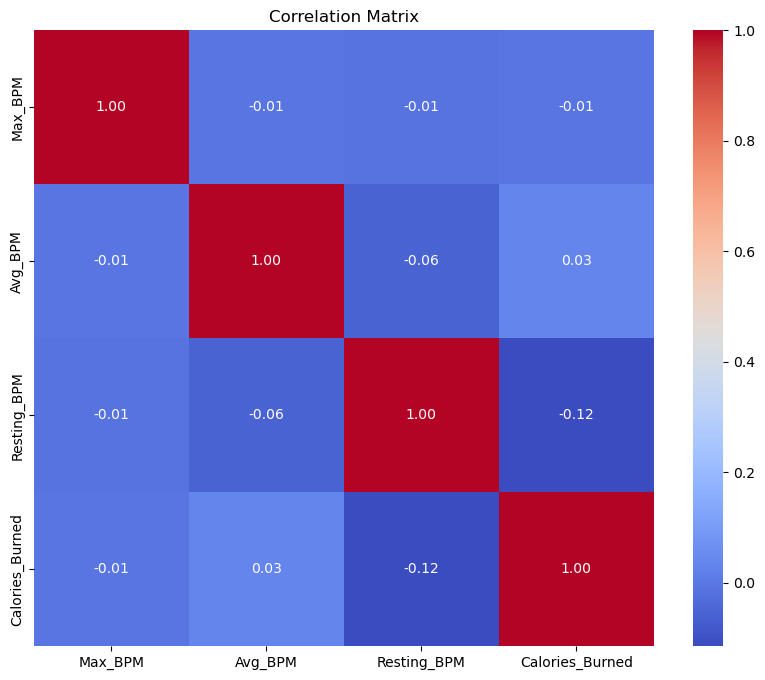

In [995]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[["Max_BPM", "Avg_BPM", "Resting_BPM", "Calories_Burned"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


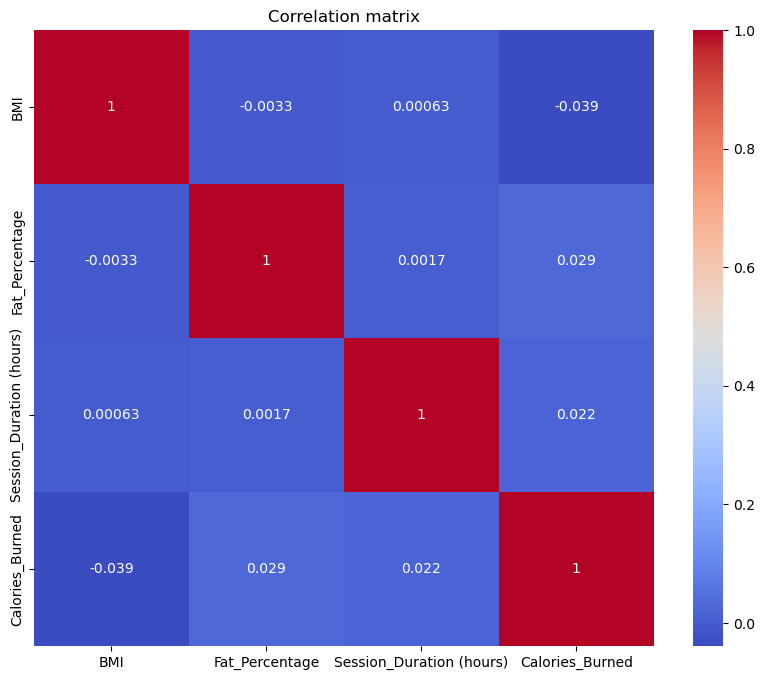

In [1011]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['BMI', 'Fat_Percentage', 'Session_Duration (hours)', 'Calories_Burned']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

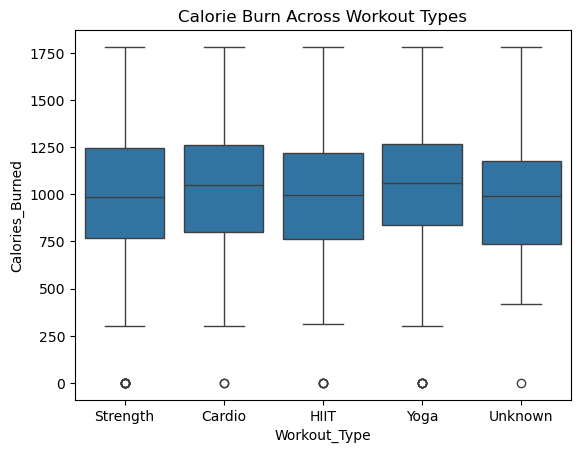

In [1009]:
sns.boxplot(x='Workout_Type', y='Calories_Burned', data=df)
plt.title('Calorie Burn Across Workout Types')
plt.show()

C:\Users\ajibo\AppData\Local\Temp\ipykernel_3664\80189482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_calories, x="Workout_Type", y="Calories_Burned", palette="viridis")


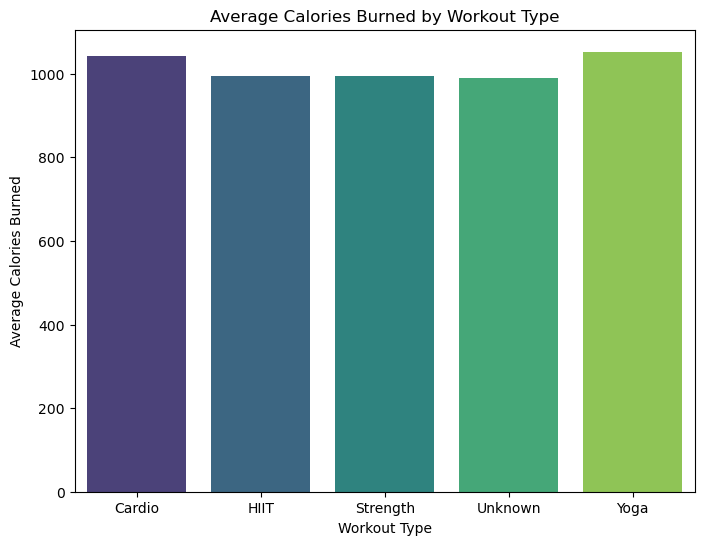

In [996]:
plt.figure(figsize=(8, 6))
avg_calories = df.groupby("Workout_Type")["Calories_Burned"].mean().reset_index()
sns.barplot(data=avg_calories, x="Workout_Type", y="Calories_Burned", palette="viridis")
plt.title("Average Calories Burned by Workout Type")
plt.xlabel("Workout Type")
plt.ylabel("Average Calories Burned")
plt.show()

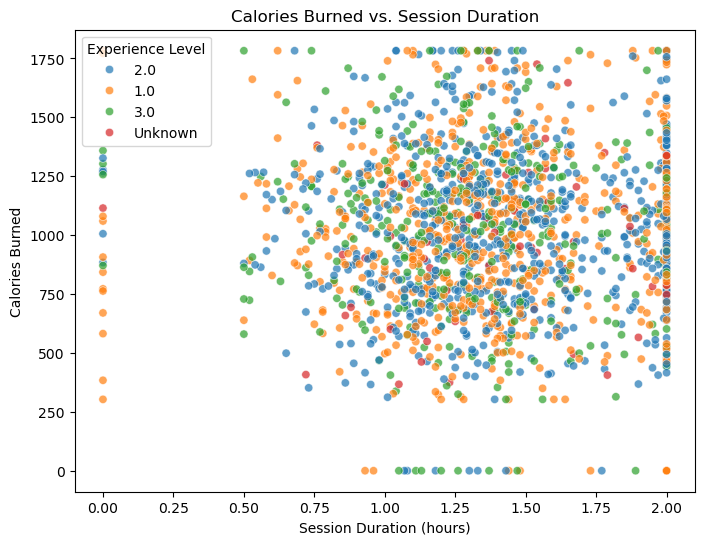

In [997]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Session_Duration (hours)", y="Calories_Burned", hue="Experience_Level", alpha=0.7)
plt.title("Calories Burned vs. Session Duration")
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.legend(title="Experience Level")
plt.show()

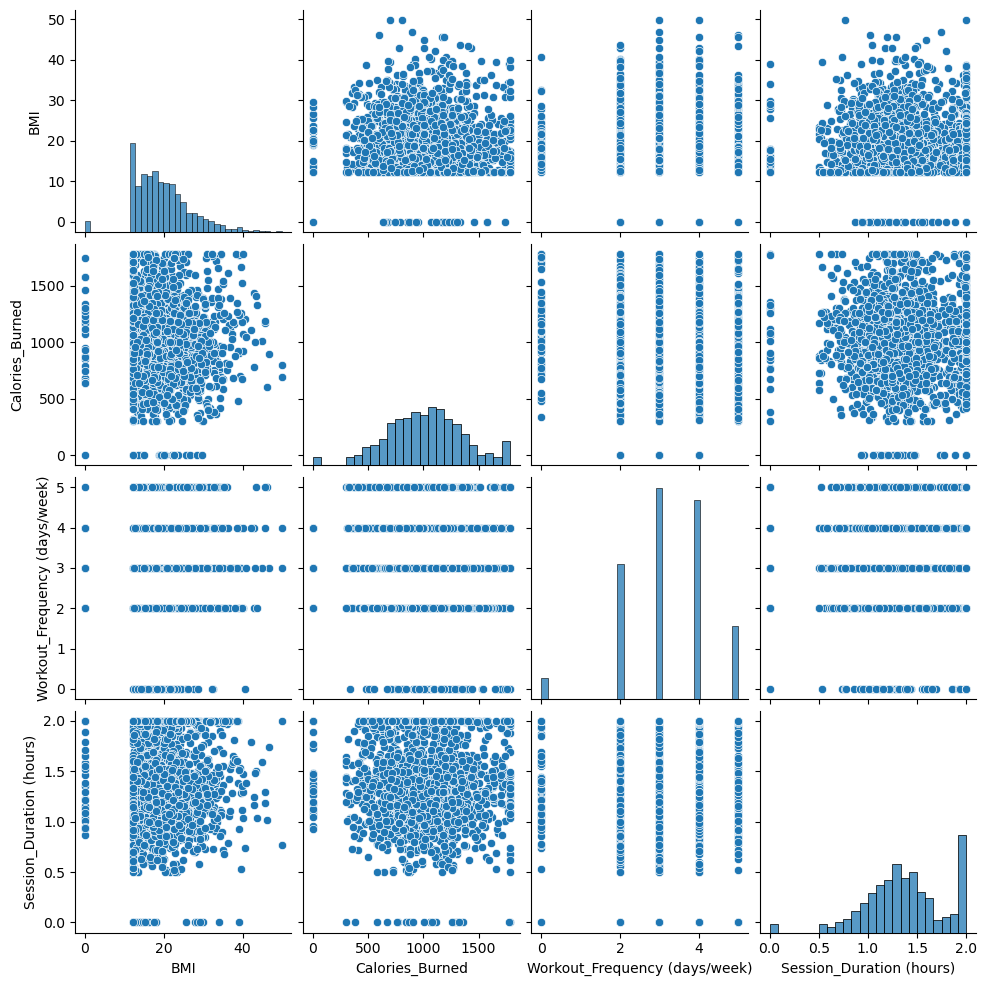

In [1007]:
sns.pairplot(df, vars=['BMI', 'Calories_Burned', 'Workout_Frequency (days/week)', 'Session_Duration (hours)'])
plt.show()

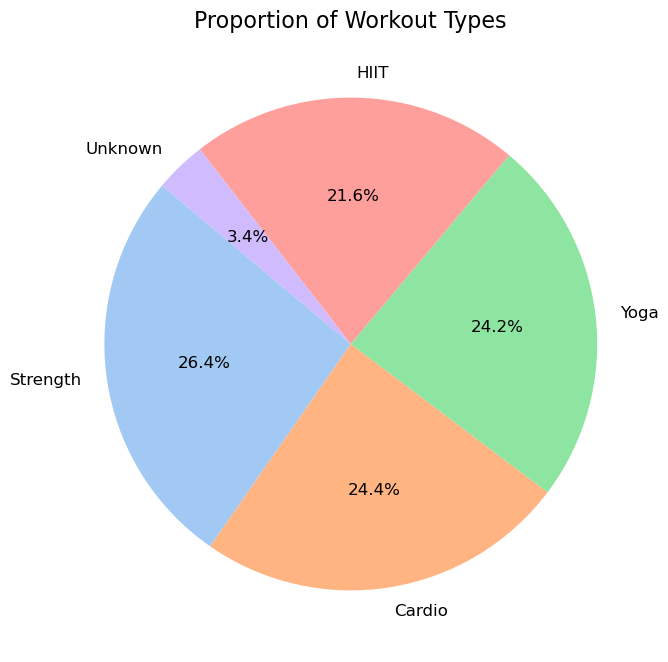

In [998]:
plt.figure(figsize=(8, 8))
plt.pie(
    workout_counts,
    labels=workout_counts.index,
    autopct="%1.1f%%",  # Formats percentages with 1 decimal
    startangle=140,
    colors=sns.color_palette("pastel"),
    textprops={"fontsize": 12}  # Adjust font size
)
plt.title("Proportion of Workout Types", fontsize=16)  # Adjust title size
plt.show()

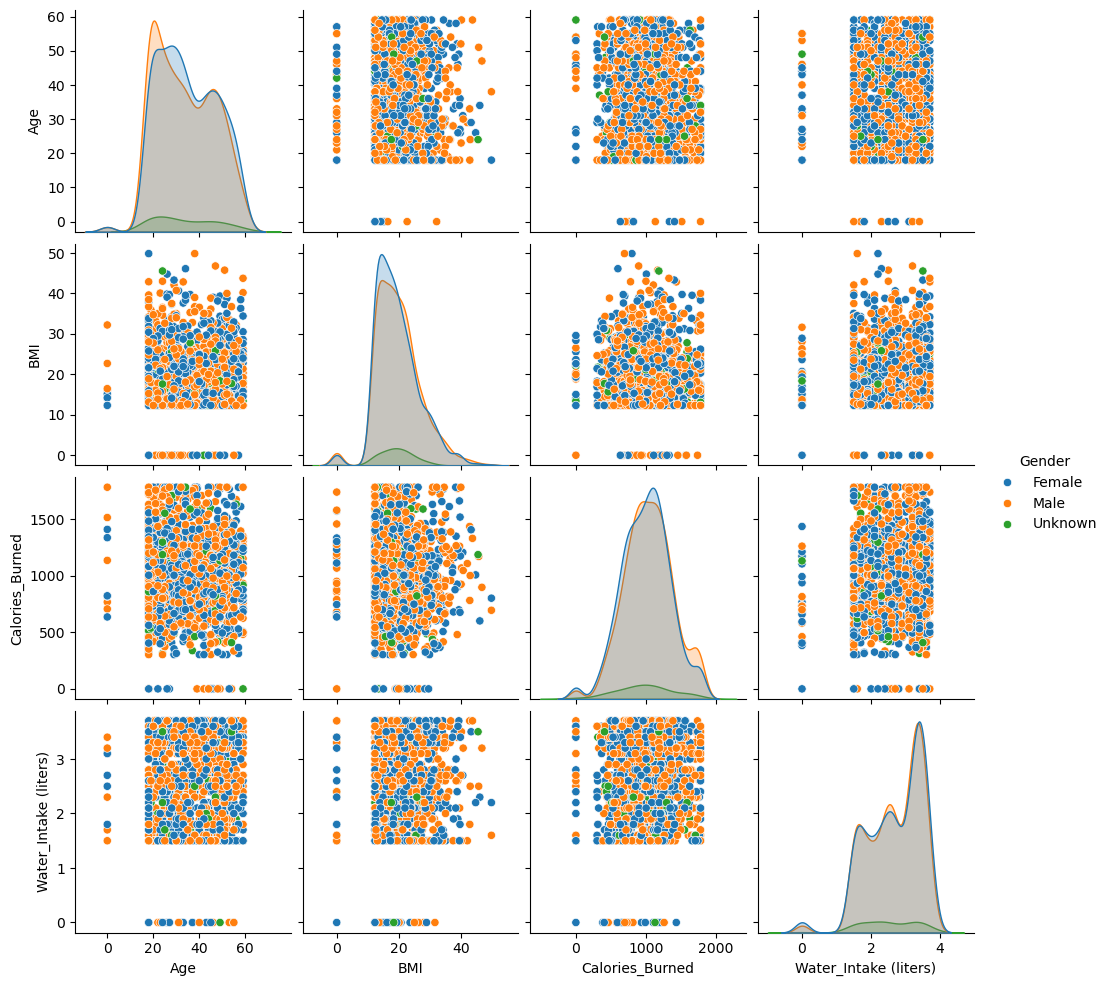

In [999]:
sns.pairplot(df, vars=["Age", "BMI", "Calories_Burned", "Water_Intake (liters)"], hue="Gender")
plt.show()


C:\Users\ajibo\AppData\Local\Temp\ipykernel_3664\3407639267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Workout_Type", y="Calories_Burned", palette="muted")


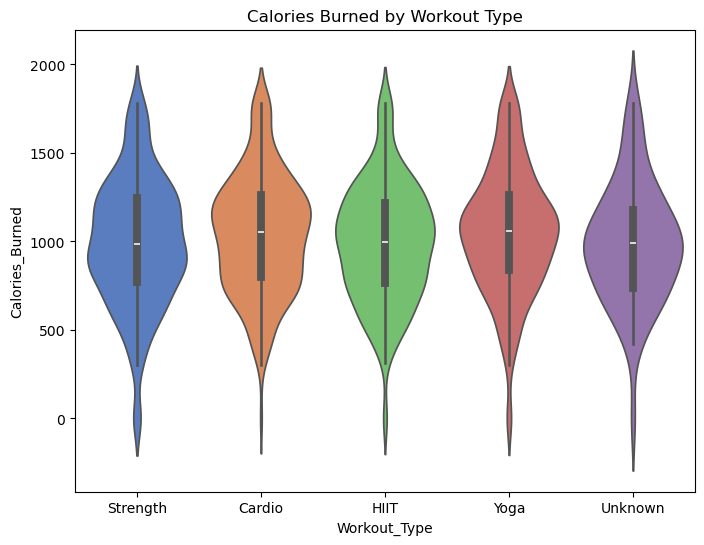

In [1000]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="Workout_Type", y="Calories_Burned", palette="muted")
plt.title("Calories Burned by Workout Type")
plt.show()

In [1001]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,CaloriesPerSession,Calorie_Burn_Rate,Heart_Rate_Variability
0,34.0,Female,86.7,1.86,174,152.0,74.0,1.12,712.0,Strength,12.8,2.4,5.0,2.0,14.31,635.714286,635.714286,22.0
1,26.0,Female,84.7,1.83,166,156.0,73.0,1.00,833.0,Strength,27.9,2.8,5.0,2.0,33.49,833.000000,833.000000,10.0
2,22.0,Male,64.8,1.85,187,166.0,64.0,1.24,1678.0,Cardio,28.7,1.9,3.0,2.0,12.73,1353.225806,1353.225806,21.0
3,54.0,Female,75.3,1.82,187,169.0,58.0,1.45,628.0,Cardio,31.8,2.4,4.0,1.0,20.37,433.103448,433.103448,18.0
4,34.0,Female,52.8,1.74,177,169.0,66.0,1.60,1286.0,Strength,26.4,3.2,4.0,2.0,20.83,803.750000,803.750000,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,54.0,Male,88.5,2.00,173,134.0,58.0,1.11,1388.0,HIIT,27.7,3.7,3.0,2.0,36.73,1250.450450,1250.450450,39.0
1796,52.0,Male,84.3,1.69,164,169.0,54.0,0.77,1367.0,HIIT,32.6,2.9,3.0,2.0,15.11,1775.324675,1775.324675,-5.0
1797,47.0,Male,70.1,1.84,188,129.0,67.0,1.20,1261.0,Strength,28.4,2.5,3.0,2.0,17.99,1050.833333,1050.833333,59.0
1798,35.0,Male,49.3,1.71,180,152.0,73.0,1.04,956.0,Cardio,32.9,1.7,4.0,3.0,12.65,919.230769,919.230769,28.0


In [1002]:
# One-hot encode Gender without dropping the first category
df = pd.get_dummies(df, columns=['Gender'], drop_first=False)  # Keep the original 'Gender' column

# Select features and target
features = ['Age', 'BMI', 'Heart_Rate_Variability', 'Session_Duration (hours)', 
            'Workout_Frequency (days/week)'] + [col for col in df.columns if 'Gender_' in col]
X = df[features]
y = df['Calories_Burned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [1012]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 122673.34286722222
R^2 Score: -0.08990121253123129


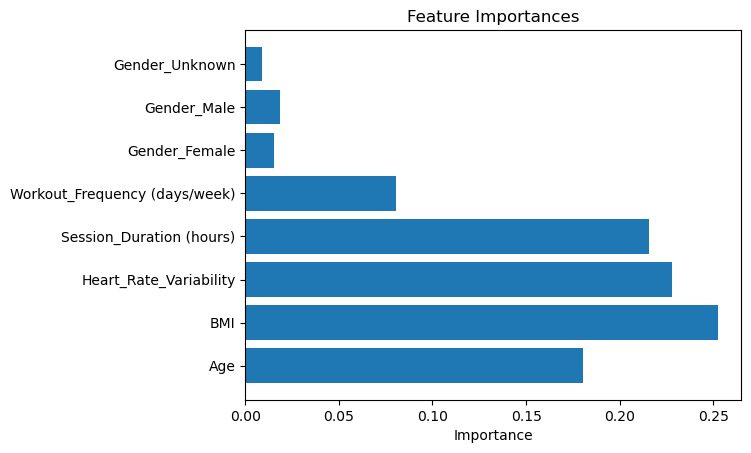

In [1013]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [1014]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 283.9311666666667
